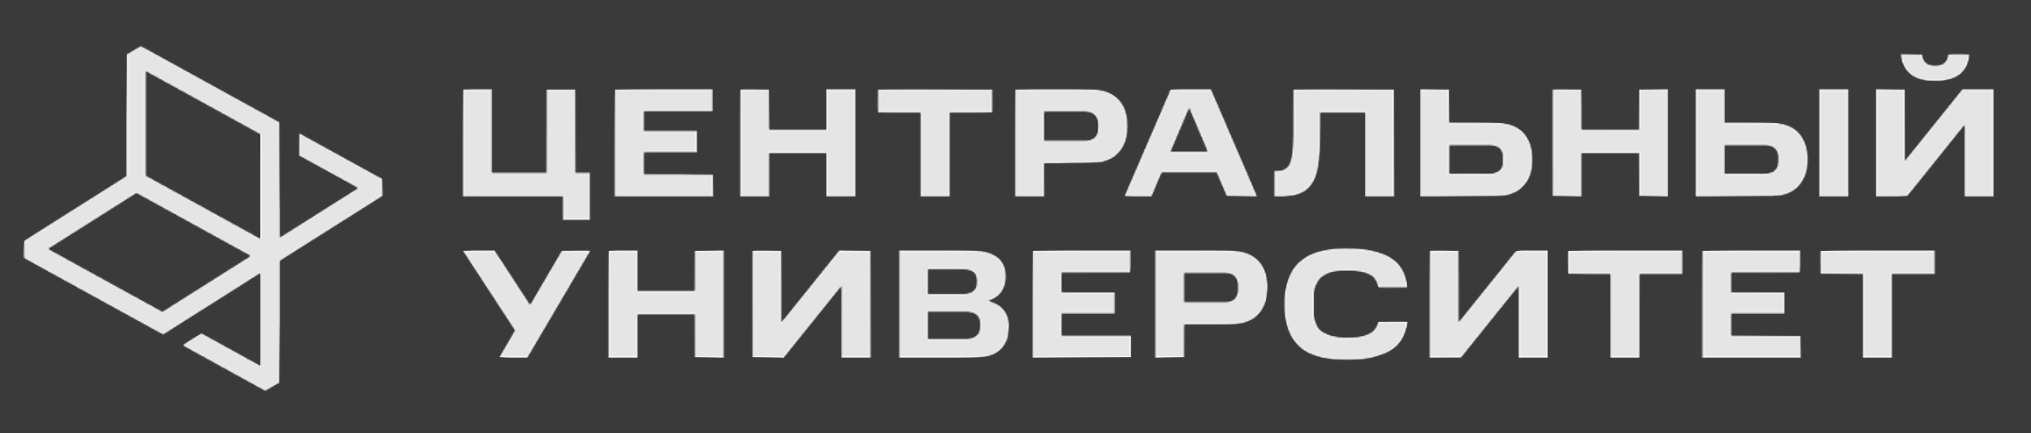

# Подгружаем библиотеки

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
from sklearn import model_selection, datasets, linear_model, metrics
import datetime as dt
import statistics

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Зададим функции, которые вам могут пригодиться

Z conf interval



$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [ ]:
def z_cof_int_mean(mean, std, n, alpha):
  Z = norm.ppf(1-alpha/2)
  delta =  Z * (std/np.sqrt(n))
  return mean - delta, mean + delta

#Аналогичная пакетная функция
#norm.interval()

Z conf interval for proportion

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [ ]:
def z_cof_int_prop(m, n, alpha):
  Z = norm.ppf(1-alpha/2)
  p_hat = m/n
  delta =  Z * np.sqrt((p_hat*(1-p_hat))/n )
  return p_hat - delta, p_hat + delta

#Аналогичная пакетная функция
#proportion_confint()

In [ ]:
# для бутстрапа
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# Задача 1 (2 балла)

В селе Тутуево, случайно отобрали 125 жителей: 80 женщин и 45 мужчин, измерили их средний рост,  получили 165 см у женщин с стандартным отклонением 20 см и 170 см у мужчин с стандартным отклонением 8 см.

1.   Найдите 95% доверительные интервалы роста вокруг среднего для мужчин и женщин.
2.   Можно ли утверждать что мужчины в селе Тутуево в среднем выше женщин?


In [ ]:
#доверительный интервал для женщин
print('доверительный интервал для женщин:', z_cof_int_mean(165, 20, 80, 0.05))

#доверительный интервал для мужчин
print('доверительный интервал для мужчин:', z_cof_int_mean(170, 8, 45, 0.05))

print('Нельзя утверждать, что средний рост женщин меньше, чем мужчин, так как доверительные интервалы пересекаются')

доверительный интервал для женщин: (160.6173872971171, 169.3826127028829)
доверительный интервал для мужчин: (167.66260655846244, 172.33739344153756)
Нельзя утверждать, что средний рост женщин меньше, чем мужчин, так как доверительные интервалы пересекаются


# Задача 2 (2 балла)

По результатам социологического обследования при опросе 1500 респондентов рейтинг губернатора (т.е. процент опрошенных, одобряющих его деятельность) составил 30%.

1. Найти грани в которых с надежностью 0,95 заключен рейтинг губернатора (при опросе всех жителей штата).
2. Сколько респондентов надо опросить, чтобы с надежностью 0,99 гарантировать предельную ошибку социологического обследования не более 1%?
3. Тот же вопрос, никаких данных о рейтинге губернатора нет.


In [ ]:
print('доверительный интевал для опроса -', z_cof_int_prop(450, 1500, 0.05))
print('доверительный интевал для опроса на 154815 человек -', z_cof_int_prop(154815*0.3, 154815, 0.01))
print('доверительный интевал для опроса на 154814 человек -', z_cof_int_prop(154814*0.3, 154814, 0.01))
print('То есть для точности 1% при рейтинге губернатора 30% надо опросить 154815 человек.')
stat_intervals(0.3, 0.01)

доверительный интевал для опроса - (0.2768093933909184, 0.32319060660908155)
доверительный интевал для опроса на 154815 человек - (0.2970000072277596, 0.3029999927722404)
доверительный интевал для опроса на 154814 человек - (0.2969999975387524, 0.3030000024612476)
То есть для точности 1% при рейтинге губернатора 30% надо опросить 154815 человек.


array([0.3, 0.3])

# Задача 3 (6 баллов)

Вам доступен датасет с данными по стоимостям заказов в ветеринарной клинике.

Описание данных

*   id_order - айди заказа
*   animal - тип животного
*   species - разновидность животного
*   check - стоимость заказа, в копейках.


Вам нужно:

1. Посчитать средние чеки по типам животных как арифметическую средню и построить интервальную оценку. Можно ли утверждать, что они отличаются при уровне значимости alpha = 0.05 ?
2. Тот же вопрос, но если почистить от выбросов? (Метод чистки от выбросов определите сами)
3. А если посчитать средние чеки c помощью медианы, построить доверительный интервал с помощью бутстрапа и сравнить без чистки от выбросов. Какие из интервалов НЕ пересекаются?

In [ ]:
!gdown 1p5374Tdjw5u6-nkhRbqWj-KaAffymQNb

Downloading...
From: https://drive.google.com/uc?id=1p5374Tdjw5u6-nkhRbqWj-KaAffymQNb
To: /content/vet_clinic.xlsx
100% 131k/131k [00:00<00:00, 102MB/s]


In [ ]:
df = pd.read_excel('vet_clinic.xlsx')

In [ ]:
df.head()

,id_order,animal,species,check
0,3645743,Кошка,Уличная,35124
1,3645744,Кошка,Домашняя обыкновенная,30789
2,3645745,Собака,Уличная,30386
3,3645745,Собака,Домашняя обыкновенная,33967
4,3645746,Собака,Домашняя обыкновенная,57745


In [ ]:
cats = list(df.where(df['animal'] == 'Кошка')['check'].dropna())
dogs = list(df.where(df['animal'] == 'Собака')['check'].dropna())
exotic = list(df.where(df['animal'] == 'Экзотическое животное')['check'].dropna())

print('Доверительный интервал для собак:', z_cof_int_mean(sum(dogs)/len(dogs), statistics.pstdev(dogs), len(dogs), 0.05))
print('Доверительный интервал для кошек:', z_cof_int_mean(sum(cats)/len(cats), statistics.pstdev(cats), len(cats), 0.05))
print('Доверительный интервал для экзотики:', z_cof_int_mean(sum(exotic)/len(exotic), statistics.pstdev(exotic), len(exotic), 0.05))

print('Пересечение доверительных интервалов не пусто, поэтому средний чек не отличается статистически')

Доверительный интервал для собак: (24400.732164311245, 26614.603913918298)
Доверительный интервал для кошек: (24193.63931107968, 27501.675116781018)
Доверительный интервал для экзотики: (26242.69629401569, 31254.638532412086)
Пересечение доверительных интервалов не пусто, поэтому средний чек не отличается статистически
